In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

<h1> Gráfico da Curva 6 </h1>

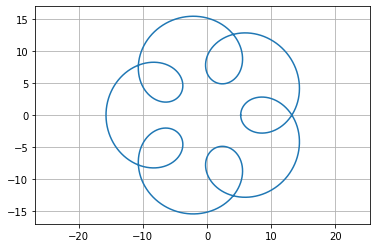

In [54]:
def curva6(t):
    x = (21/2)*np.cos(t) - (21/4)*np.cos(6*t)
    y = (21/2)*np.sin(t) - (21/4)*np.sin(6*t)
    return x, y

t = np.linspace(0, 2*np.pi, int(1e7), endpoint=False)
x, y = curva6(t)

plt.axis('equal')
plt.plot(x, y)
plt.grid()
plt.savefig("curva", dpi=180)
plt.show()    

<h2>Pontos de autointersecao</h2>

In [67]:
funcoes = [
    lambda B : (-21/2)*np.sin(B/2)+(-21/4)*np.sin(3*B),
    lambda B : 8.495*np.sin(B/2)+4.247*np.sin(3*B),
    lambda B : 3.245*np.sin(B/2)-1.622*np.sin(3*B),
    lambda B : -3.245*np.sin(B/2)-1.622*np.sin(3*B),
    lambda B : -8.495*np.sin(B/2)-1.622*np.sin(3*B),
]

k_s = [2*np.pi, (2*np.pi)/5, (4*np.pi)/5, (6*np.pi)/5, (8*np.pi)/5]
b_s = []

for h in range(len(funcoes)):
    print(funcoes[h](t))

[-0.00000000e+00 -1.31946891e-05 -2.63893783e-05 ...  1.97920337e-05
  1.31946891e-05  6.59734457e-06]
[ 0.00000000e+00  1.06741894e-05  2.13483787e-05 ... -1.60098703e-05
 -1.06732469e-05 -5.33662344e-06]
[ 0.00000000e+00 -2.03795115e-06 -4.07590231e-06 ...  1.22305344e-05
  8.15368957e-06  4.07684479e-06]
[-0.00000000e+00 -4.07684479e-06 -8.15368957e-06 ...  6.11385346e-06
  4.07590231e-06  2.03795115e-06]
[-0.00000000e+00 -5.72618093e-06 -1.14523619e-05 ...  1.16584503e-06
  7.77230020e-07  3.88615010e-07]
[]


<h2>Pontos em que a reta tangente é vertical</h2>

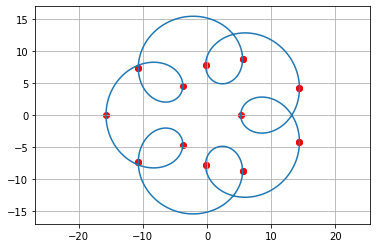

In [68]:
def curv_linha(t):
    x_linha = (63/2)*np.sin(6*t) - (21/2)*np.sin (t) 
    y_linha = (21/2)*np.cos(t) - (63/2)*np.cos(6*t)
    return x_linha, y_linha
x_linha, y_linha = curv_linha(t)

idx = np.where((abs(x_linha) < 1e-4) & (abs(y_linha) > 1e-4))
ts = set(np.round(np.take(t, idx[0]), 3))
plt.axis('equal')
plt.plot(x, y)
plt.scatter(np.take(x, idx[0]), np.take(y, idx[0]), color='r')
plt.grid()
plt.savefig("pontos_verticais",dpi=160)
plt.show()





<h2>Pontos em que a reta tangente é horizontal</h2>

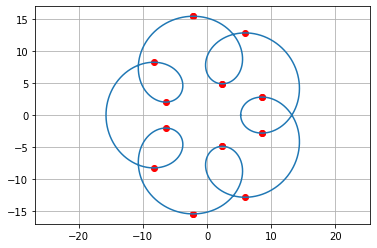

In [69]:
idxh = np.where((abs(x_linha) > 1e-4) & (abs(y_linha) < 1e-4))
tsh = set(np.round(np.take(t, idx[0]), 3))
plt.axis(   'equal')
plt.plot(x, y)
plt.scatter(np.take(x, idxh[0]), np.take(y, idxh[0]), color='r')
plt.grid()
plt.savefig("pontos_horizontais",dpi=160)

plt.show()

<h2>Comprimento da curva</h2>

<h3>Aproximação pela poligonal</h3>

In [70]:
pontos = list(zip(*curva6(np.linspace(0,2*np.pi, 1000, endpoint=False))))
sum(map(euclidean, pontos[:-1], pontos[1:]))

NameError: name 'euclidean' is not defined

<h3>Comprimento pela integral</h3>

In [ ]:
def g(t):
    return np.sqrt(sum(np.array(curv_linha(t))**2))
#Soma de Riemann
dt = t[1] - t[0]
I1 = 0
for i in g(t):
    I1 += i*dt
I2 = integrate.quad(g,0,2*np.pi)

print(f"Resultado da Soma de Riemman: {I1} \nResultado SciPy Integrate: {I2[0]}")